In [3]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

## Test for the Gillespie algorithm

In [4]:
# this string must be passed during the execution of gillespie_test.exe
data_dir = '../data/test/LV/'

### Setting the parameters

In [5]:
params = dict()

# LV parameters
params['rhos'] = [1, 1]
params['chis'] = [3, 1]
params['fs'] = [1.002, 1]
params['M'] = 500
print("c = " + str(params['chis'][0] - params['chis'][1]))
print("Mt*s = " + str((params['fs'][0] - params['fs'][1]) * params['M']/params['chis'][1]))

# Gillespie parameters
params['time_scale'] = len(params['chis'])*params['M']/np.min(params['chis'])
params['end_cond'] = 'time'
params['max_steps'] = 5000
#params['end_cond'] = 'passage'
#params['up_bounds'] = [2000,2000]
#params['low_bounds'] = [0,0]
params['traj_step'] = 1
params['init_state'] = [0, params['M']/params['chis'][1]] # Initial condition
params['N_real'] = 1000

c = 2
Mt*s = 1.0000000000000009


In [6]:
ut.write_params(params, data_dir, 'param.txt')

### Importing and analysing the results

In [10]:
traj, labels = ut.read_traj(data_dir+'traj.txt')
av_traj, labels = ut.read_traj(data_dir+'moment_1.00.txt')
m2_traj, labels = ut.read_traj(data_dir+'moment_2.00.txt')
xs = traj[:,0]
n0s = traj[:,1]
n1s = traj[:,2]
av_xs = av_traj[:,0]
av_n0s = av_traj[:,2]
av_n1s = av_traj[:,3]
m2_n0s = m2_traj[:,2]
m2_n1s = m2_traj[:,3]

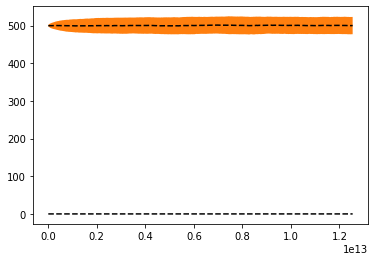

In [11]:
plt.plot(av_xs, av_n0s, c='black', ls='--')
plt.plot(av_xs, av_n1s, c='black', ls='--')
std = np.sqrt(m2_n0s - av_n0s**2)
plt.fill_between(av_xs, av_n0s - std, av_n0s + std)
std = np.sqrt(m2_n1s[1:] - av_n1s[1:]**2)
plt.fill_between(av_xs[1:], av_n1s[1:] - std, av_n1s[1:] + std)
#plt.fill_between(av_xs, av_n1s, c='black', ls='--')

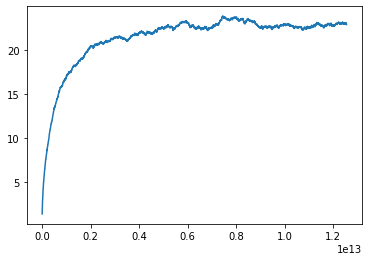

In [12]:
plt.plot(av_xs[1:], np.sqrt(m2_n1s[1:] - av_n1s[1:]**2))

In [51]:
traj

array([[3.31495e-01, 1.00000e+01, 1.00100e+03],
       [4.09889e-01, 1.00000e+01, 1.00200e+03],
       [1.87358e+00, 1.00000e+01, 1.00100e+03],
       ...,
       [2.71763e+03, 3.00000e+00, 8.01000e+02],
       [2.71772e+03, 3.00000e+00, 8.00000e+02],
       [2.72048e+03, 3.00000e+00, 7.99000e+02]])

In [38]:
av_xs

array([   2.4918,  691.105 , 1350.09  ])

In [40]:
av_traj

array([[2.49180e+00,         nan, 1.00000e+01, 9.99000e+02],
       [6.91105e+02,         nan, 1.20000e+01, 9.11000e+02],
       [1.35009e+03, 1.01377e-05, 1.10000e+01, 8.54000e+02]])

In [67]:
(1999**2+2000**2+2000**2)/3

3998667.0